In [2]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import AgglomerativeClustering
hier = AgglomerativeClustering()
from sklearn.metrics.pairwise import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

#### All

In [3]:
df = pd.read_csv('../data/user_summary.csv')[['user_id','total_prod_morning','total_prod_lunch',\
                                              'total_prod_afternoon','total_prod_evening','total_prod_afterhours',\
                                              'total_prod_early_week','total_prod_late_week','total_prod_weekend',\
                                              'med_products', 'med_days', 'med_reordered']]

#### Segments

In [4]:
parents = pd.read_csv('../data/parents.csv')
drinks = pd.read_csv('../data/drinkers.csv')
pets = pd.read_csv('../data/pet_owners.csv')

df_parents = pd.merge(parents, df, how='left', left_on='user_id', right_on='user_id')
df_drinks = pd.merge(drinks, df, how='left', left_on='user_id', right_on='user_id')
df_pets = pd.merge(pets, df, how='left', left_on='user_id', right_on='user_id')

In [5]:
df = df.drop(['user_id'], axis=1)
df_parents = df_parents.drop(['user_id'], axis=1)
df_drinks = df_drinks.drop(['user_id'], axis=1)
df_pets = df_pets.drop(['user_id'], axis=1)

In [6]:
def linkage_frame(data):
    row_clusters = linkage(data, method='complete', metric='euclidean')
    columns = ['row label 1', 'row label 2', 'distance', 'no. items in clust.']
    index = ['cluster %d' % (i + 1) for i in range(row_clusters.shape[0])]
    linkage_df = pd.DataFrame(row_clusters, columns=columns, index=index)
    return linkage_df

### All

In [ ]:
# I've killed 3 kernels. The full df is too large for this method.
linkage_df = linkage_frame(df)

### Parents

In [7]:
# Even this was super heavy
linkage_df = linkage_frame(df_parents)

In [17]:
linkage_df.sample(10)

,row label 1,row label 2,distance,no. items in clust.
cluster 7047,6856.0,21873.0,35.142963,2.0
cluster 2316,4651.0,21315.0,23.369248,2.0
cluster 1847,35364.0,35583.0,21.983151,7.0
cluster 25173,30136.0,55493.0,98.356644,3.0
cluster 16201,16622.0,49497.0,59.170206,5.0
cluster 25730,5277.0,12793.0,102.166531,2.0
cluster 27119,55245.0,60589.0,112.890483,5.0
cluster 18413,49006.0,49077.0,66.355516,4.0
cluster 27205,13728.0,30442.0,113.644183,2.0
cluster 424,934.0,35021.0,15.525255,3.0


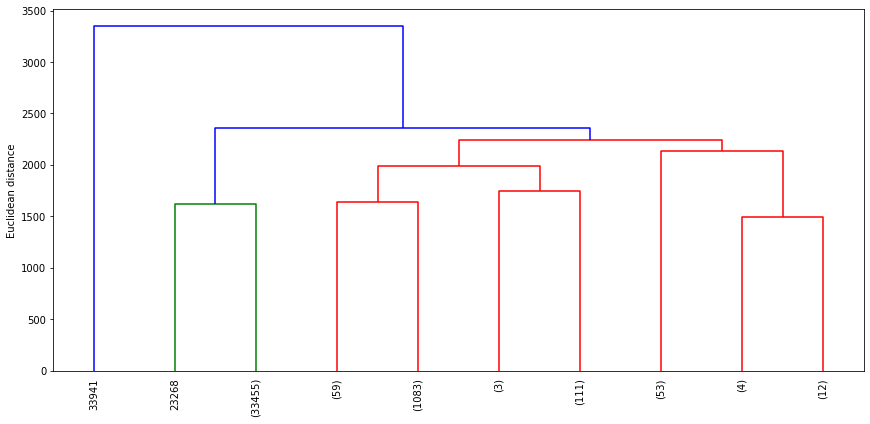

In [18]:
# Doubtful this will run
plt.figure(figsize=(12,6))
row_dendr = dendrogram(linkage_df, leaf_rotation=90, truncate_mode='lastp', p = 10, leaf_font_size=10)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()